<a href="https://colab.research.google.com/github/lenmoru666/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 9 – Morfologi (Erosi, Dilasi, Opening, Closing,Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV

In [9]:
def dilate(image,kernel):
    se_y = kernel.shape[0]//2
    se_x = kernel.shape[1]//2
    dilated = np.zeros_like(image)
    for y in range(se_y, image.shape[0]-se_y):
        for x in range(se_x, image.shape[1]-se_x):
            dilated[y,x] = np.max(image[y-se_y:y+se_y+1, x-se_x:x+se_x+1] * kernel)
    return dilated


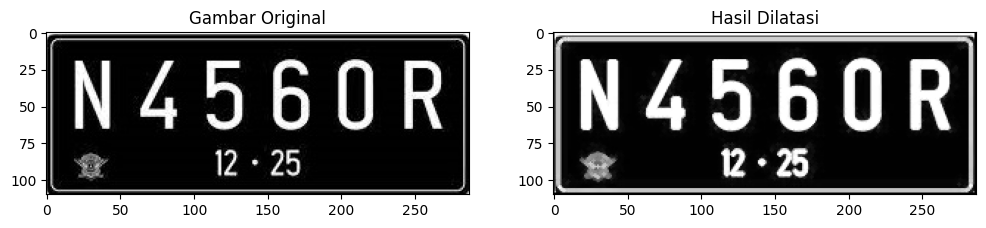

In [10]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)

kernel =  np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
dilated = dilate(original, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(dilated, cmap='gray'), plt.title('Hasil Dilatasi')
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

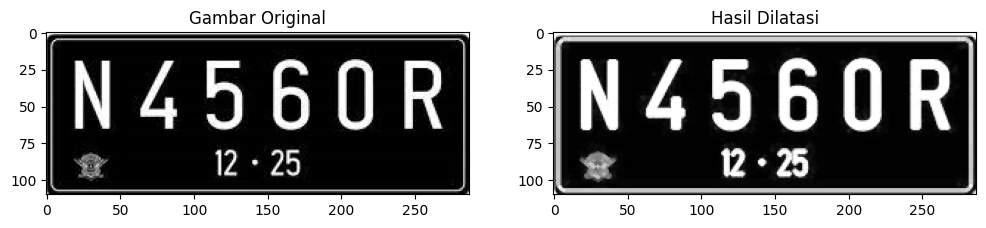

In [11]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated = cv.dilate(original, kernel, iterations=1)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(dilated, cmap='gray'), plt.title('Hasil Dilatasi')
plt.show()

5.  Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV,

In [12]:
def erode(image,kernel):
    se_y = kernel.shape[0]//2
    se_x = kernel.shape[1]//2
    eroded = np.zeros_like(image)
    for y in range(se_y, image.shape[0]-se_y):
        for x in range(se_x, image.shape[1]-se_x):
            eroded[y,x] = np.min(image[y-se_y:y+se_y+1, x-se_x:x+se_x+1] * kernel)
    return eroded


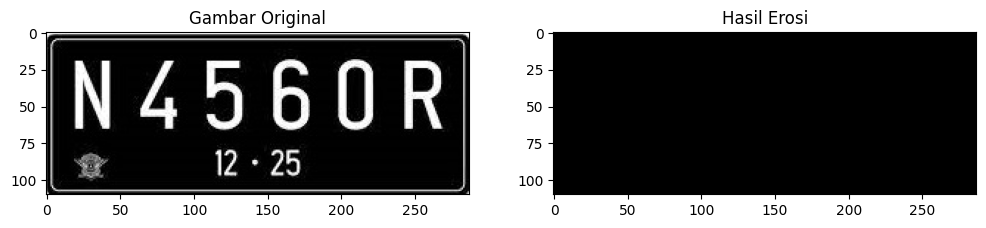

In [13]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)

np.ones((5, 5), dtype=np.uint8)

eroded = erode(original, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(eroded, cmap='gray'), plt.title('Hasil Erosi')
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV

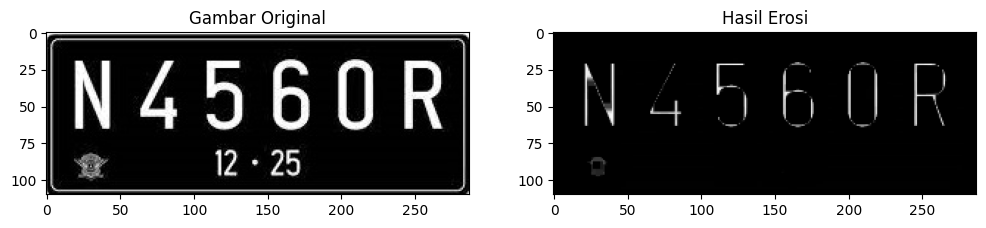

In [14]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
kernel = np.ones((5, 5), dtype=np.uint8)

eroded = erode(original, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(eroded, cmap='gray'), plt.title('Hasil Erosi')
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV

**Operasi Opening Menggunakan tanpa Library Morphology**

In [15]:
def opening(image,kernel):
    eroded = erode(image,kernel)
    opened = dilate(eroded,kernel)

    return opened


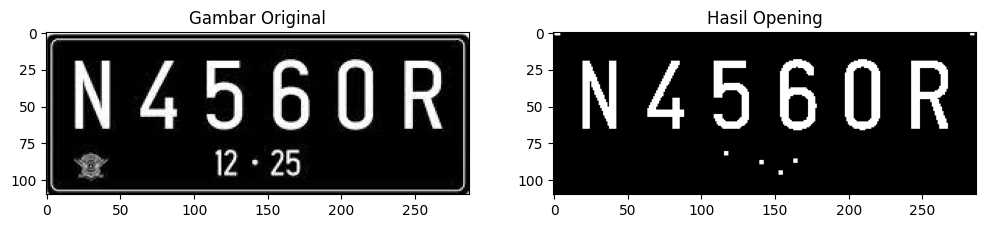

In [16]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
_, binary_img = cv.threshold(original, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((3, 3), dtype=np.uint8)

opened = opening(binary_img, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(opened, cmap='gray'), plt.title('Hasil Opening')
plt.show()

**Operasi Opening Menggunakan Library Morphology**

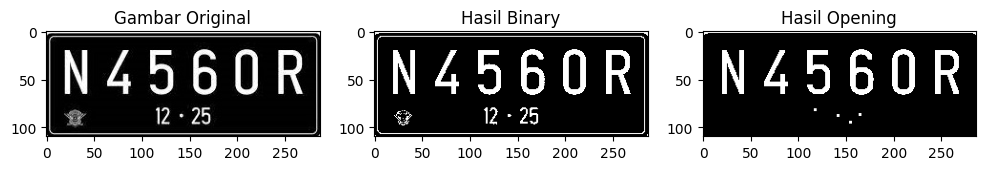

In [17]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
_, binary_img = cv.threshold(original, 127, 255, cv.THRESH_BINARY)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

opened = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(132), plt.imshow(binary_img, cmap='gray'), plt.title('Hasil Binary')
plt.subplot(133), plt.imshow(opened, cmap='gray'), plt.title('Hasil Opening')
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

**Operasi Closing Menggunakan tanpa Library Morphology**

In [18]:
def closing(image,kernel):
    dilated = dilate(image,kernel)
    closed = erode(dilated,kernel)

    return closed


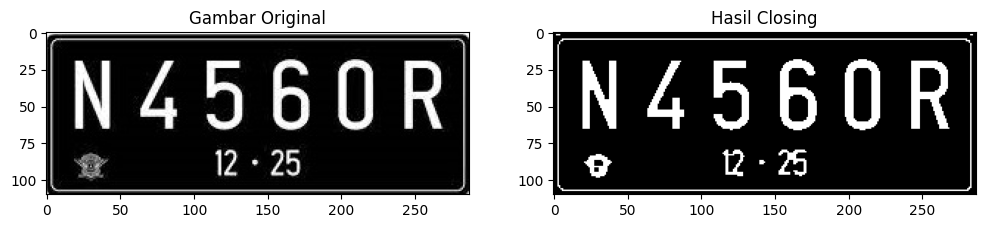

In [19]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
_, binary_img = cv.threshold(original, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((3, 3), dtype=np.uint8)

opened = closing(binary_img, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(opened, cmap='gray'), plt.title('Hasil Closing')
plt.show()

**Operasi Closing Menggunakan Library Morphology**

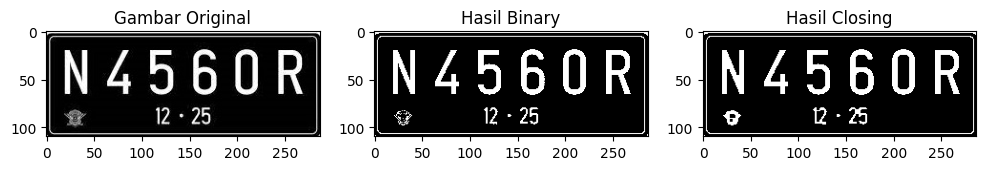

In [20]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
_, binary_img = cv.threshold(original, 127, 255, cv.THRESH_BINARY)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

closed = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(132), plt.imshow(binary_img, cmap='gray'), plt.title('Hasil Binary')
plt.subplot(133), plt.imshow(closed, cmap='gray'), plt.title('Hasil Closing')
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5,

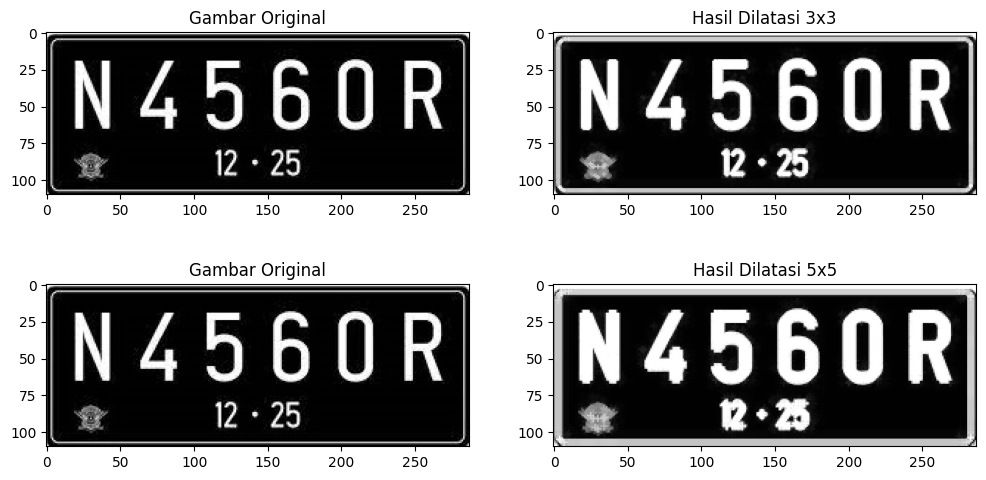

In [21]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_3 = cv.dilate(original, kernel, iterations=1)

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

dilated_5 = cv.dilate(original, kernel, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(dilated_3, cmap='gray'), plt.title('Hasil Dilatasi 3x3')
plt.subplot(223), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(224), plt.imshow(dilated_5, cmap='gray'), plt.title('Hasil Dilatasi 5x5')
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5

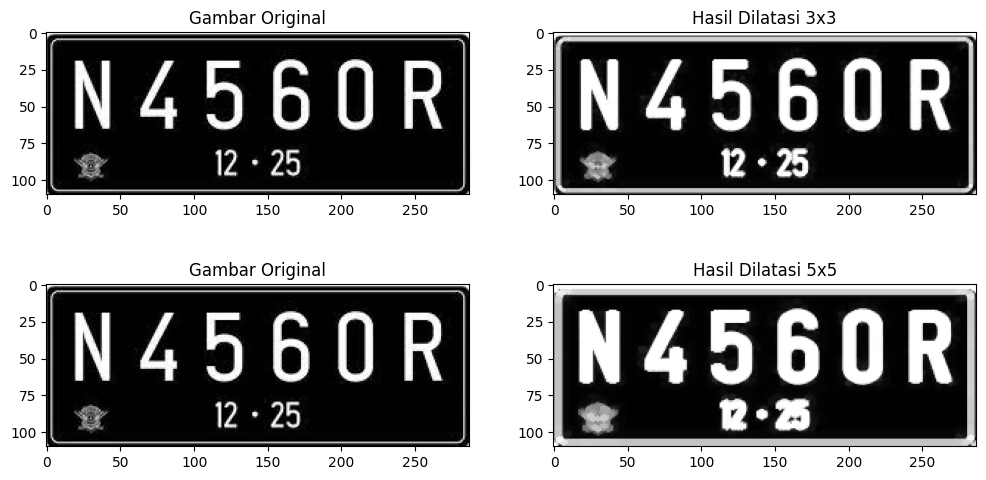

In [22]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

dilated_3 = cv.dilate(original, kernel, iterations=1)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

dilated_5 = cv.dilate(original, kernel, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(dilated_3, cmap='gray'), plt.title('Hasil Dilatasi 3x3')
plt.subplot(223), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(224), plt.imshow(dilated_5, cmap='gray'), plt.title('Hasil Dilatasi 5x5')
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7

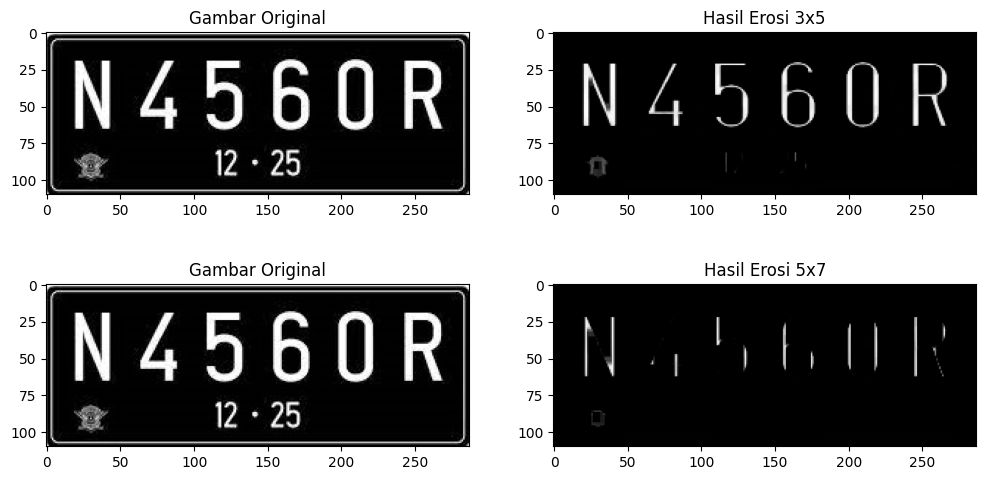

In [23]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

eroded_3 = erode(original,kernel)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

eroded_5 = erode(original,kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(eroded_3, cmap='gray'), plt.title('Hasil Erosi 3x5')
plt.subplot(223), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(224), plt.imshow(eroded_5, cmap='gray'), plt.title('Hasil Erosi 5x7')
plt.show()

 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5,

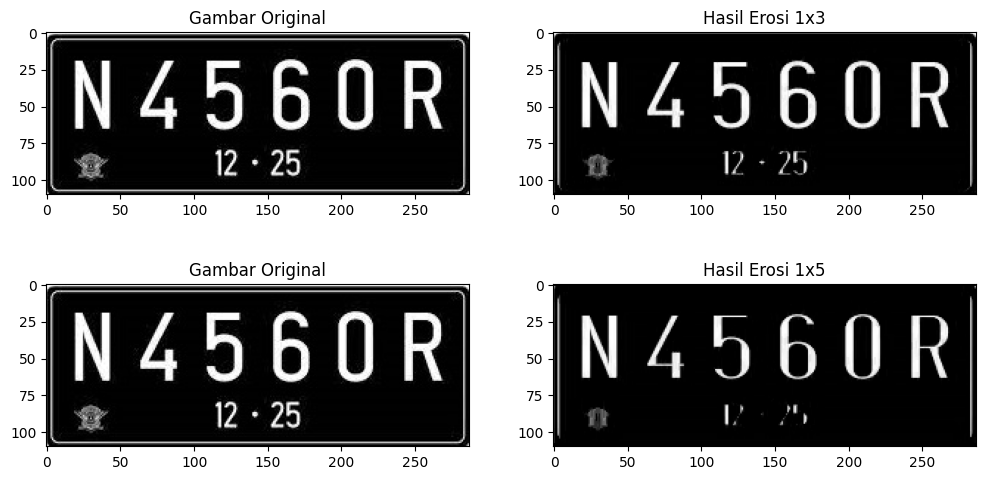

In [24]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)


kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,3))

eroded_3 = erode(original,kernel)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 5))
eroded_5 = erode(original,kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(eroded_3, cmap='gray'), plt.title('Hasil Erosi 1x3')
plt.subplot(223), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(224), plt.imshow(eroded_5, cmap='gray'), plt.title('Hasil Erosi 1x5')
plt.show()

13. TopHat

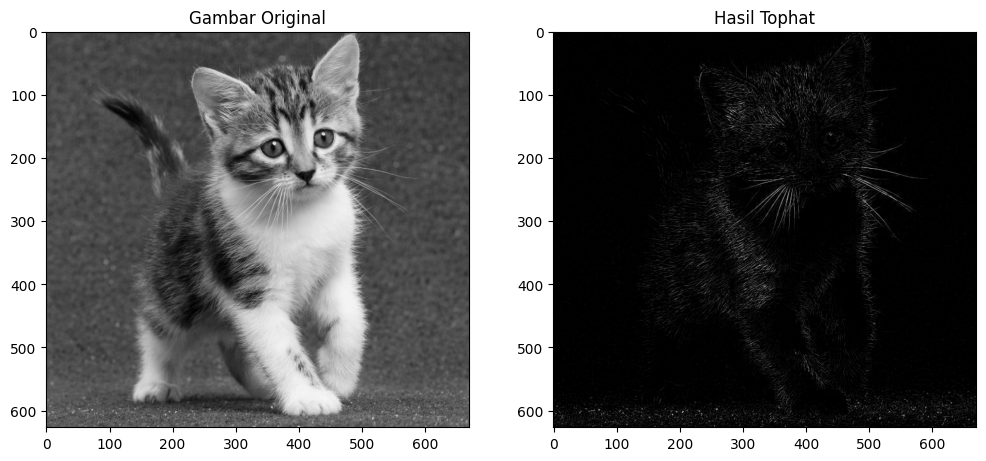

In [25]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg',0)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

tophat = cv.morphologyEx(original, cv.MORPH_TOPHAT, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(tophat, cmap='gray'), plt.title('Hasil Tophat')
plt.show()

14. Blackhat

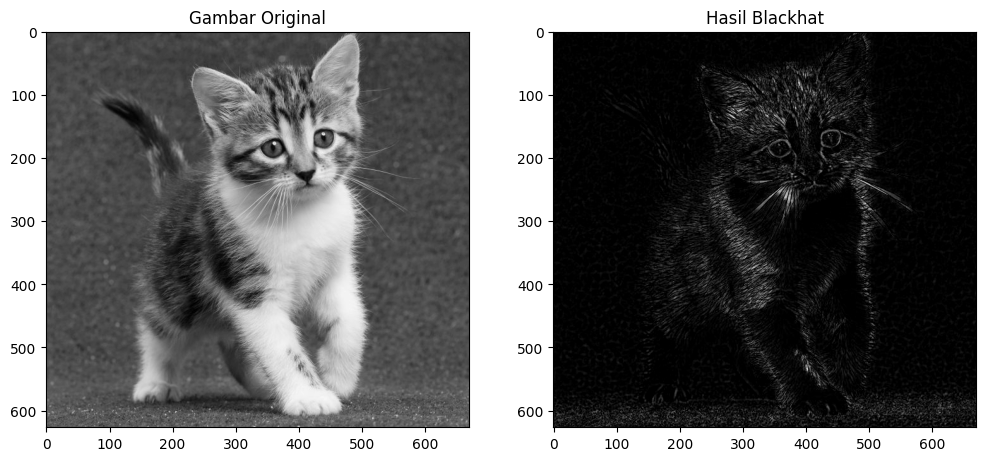

In [26]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg',0)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

blackhat = cv.morphologyEx(original, cv.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(blackhat, cmap='gray'), plt.title('Hasil Blackhat')
plt.show()

15. Skeleton

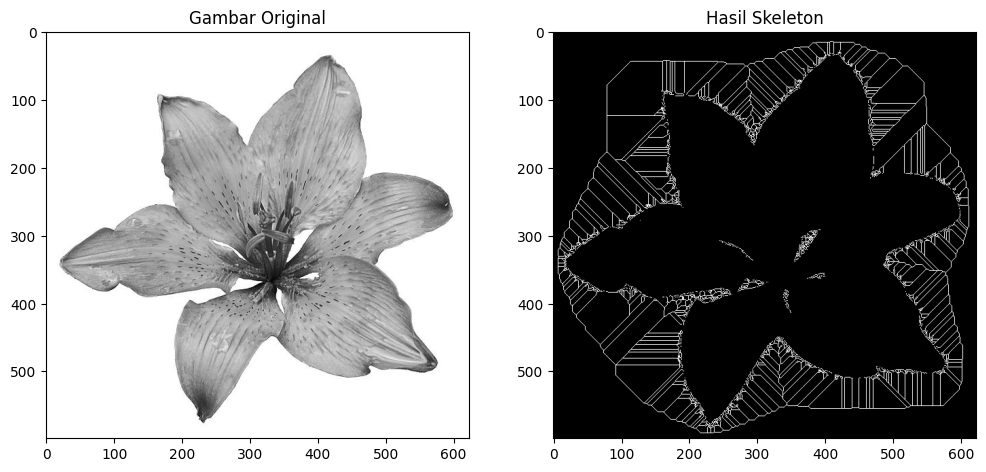

In [27]:
from skimage.morphology import skeletonize

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
_, binary_img = cv.threshold(original, 253, 255, cv.THRESH_BINARY)
binary_img = (binary_img/255).astype(np.uint(8))
skeleton = skeletonize(binary_img)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(skeleton, cmap='gray'), plt.title('Hasil Skeleton')
plt.show()

16. Skeleton Inverse

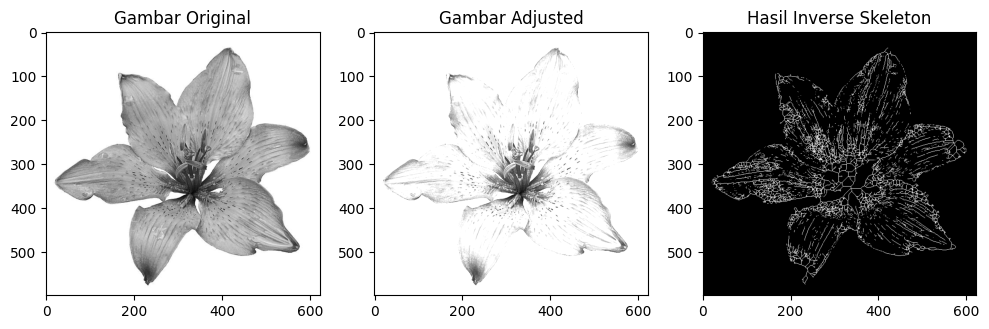

In [28]:

from skimage.morphology import skeletonize

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
adjusted = cv.convertScaleAbs(original, 2, 1.6)
_, binary_img = cv.threshold(adjusted, 253, 255, cv.THRESH_BINARY_INV)
binary_img = (binary_img/255).astype(np.uint(8))
skeleton = skeletonize(binary_img)


plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(132), plt.imshow(adjusted, cmap='gray'), plt.title('Gambar Adjusted')
plt.subplot(133), plt.imshow(skeleton, cmap='gray'), plt.title('Hasil Inverse Skeleton')
plt.show()

17. Thickening

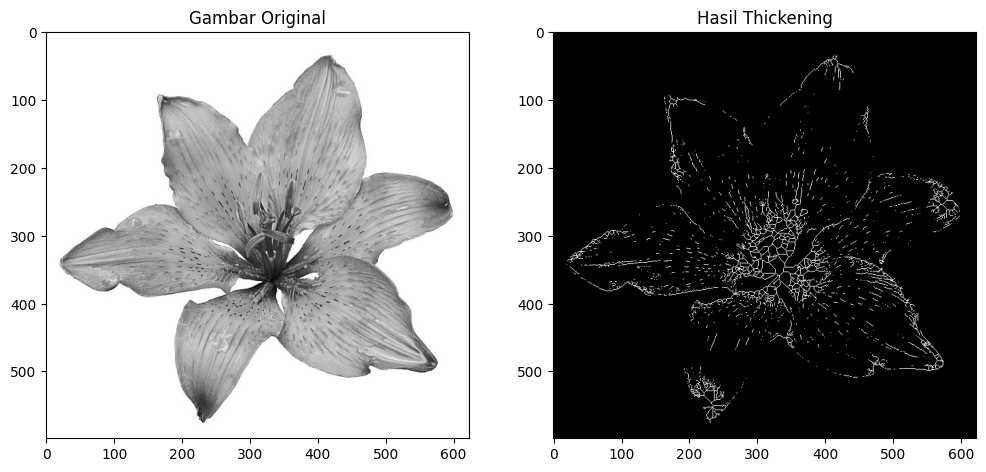

In [29]:
from skimage import morphology

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
_, binary_img = cv.threshold(original, 127, 255, cv.THRESH_BINARY_INV)
binary_img = (binary_img/255).astype(np.uint(8))
thined = morphology.thin(binary_img)


plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(thined, cmap='gray'), plt.title('Hasil Thickening')
plt.show()

## Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


In [30]:
import glob

ktp_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/KTP.jpg'):
   n = cv.imread(img)
   n = cv.resize(n,(700,350))
   ktp_images.append(n)

**Operasi Dilasi**

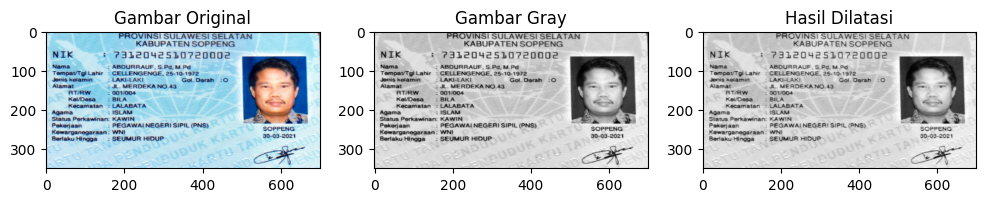

In [31]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(2,1))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  dilated = cv.dilate(gray,kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(dilated, cmap='gray'), plt.title('Hasil Dilatasi')
  plt.show()

**Erosi**

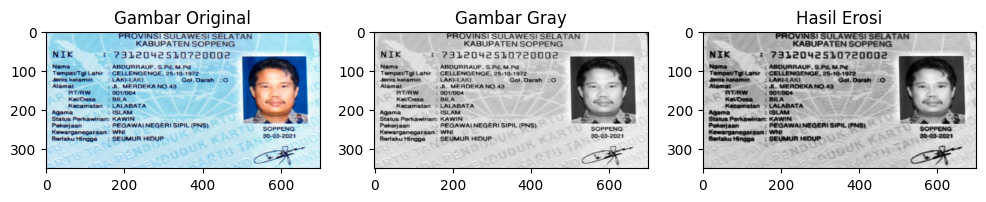

In [32]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  eroded = cv.erode(gray,kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(eroded, cmap='gray'), plt.title('Hasil Erosi')
  plt.show()

**Opening**

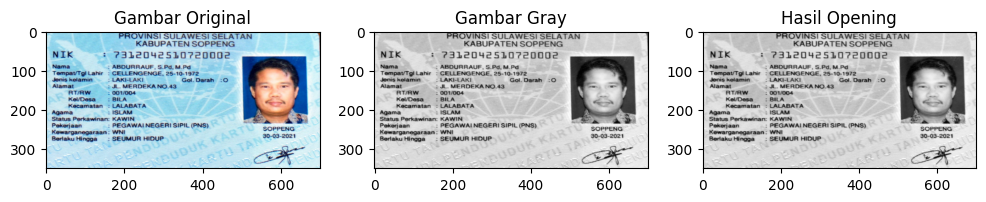

In [33]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(2,1))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  opened = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(opened, cmap='gray'), plt.title('Hasil Opening')
  plt.show()

**Closing**

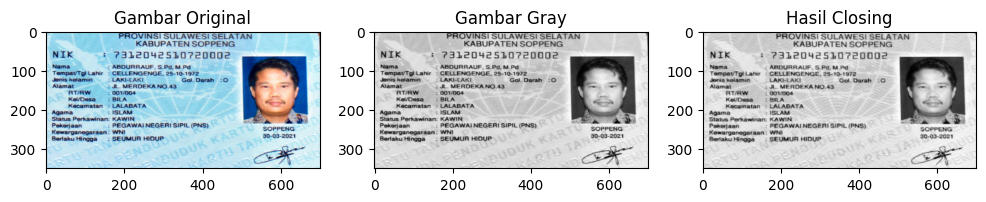

In [34]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(2,2))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  closed = cv.morphologyEx(gray, cv.MORPH_CLOSE, kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(closed, cmap='gray'), plt.title('Hasil Closing')
  plt.show()

**Tophat**

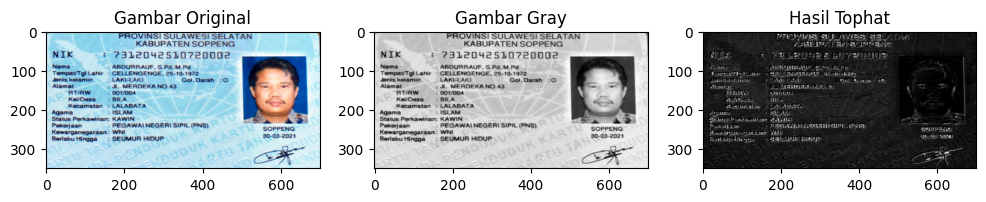

In [35]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(6,6))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  tophated = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(tophated, cmap='gray'), plt.title('Hasil Tophat')
  plt.show()

**Blackhat**

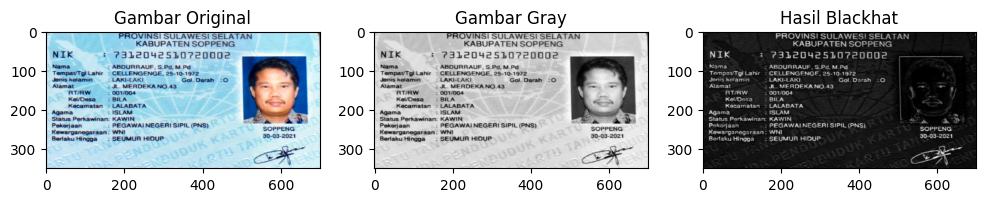

In [36]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(12,6))
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)

  blackhated = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, kernel)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(blackhated, cmap='gray'), plt.title('Hasil Blackhat')
  plt.show()

**Skeleton**

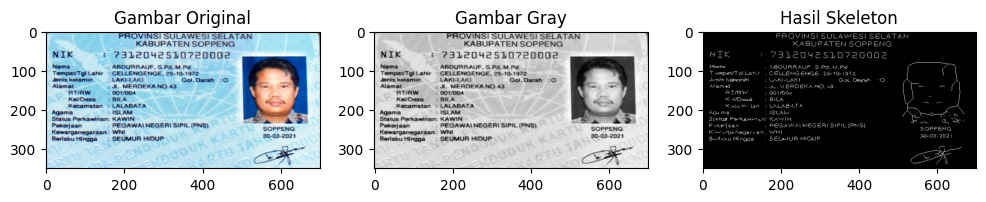

In [37]:
for i,img in enumerate(ktp_images):
  rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
  _,binary_img=cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)
  binary_img = (binary_img/255).astype(np.uint(8))
  skeletoned =skeletonize(binary_img)

  plt.figure(figsize=(12, 8))
  plt.subplot(131), plt.imshow(rgb, cmap='gray'), plt.title('Gambar Original')
  plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Gambar Gray')
  plt.subplot(133), plt.imshow(skeletoned, cmap='gray'), plt.title('Hasil Skeleton')
  plt.show()